In [162]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
from urllib.request import urlopen

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

AssertionError: 

In [3]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

NameError: name 'name' is not defined

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [116]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

In [101]:
SONAR.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
SONAR.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


Target variable is feature on column:60. So, we try to predict classes of this feature. 


In [117]:
X= SONAR.iloc[:, :-1]
y = SONAR.iloc[:, -1]

In [103]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

## Label Encoder

Labeling target values (R and M)

In [118]:
from sklearn.preprocessing import LabelEncoder

obj_df = SONAR.select_dtypes(include=['object']).copy()

lb_make = LabelEncoder()


obj_df["Sonar_signal"] = lb_make.fit_transform(obj_df[60])
obj_df[["Sonar_signal", 60]].head(11)


,Sonar_signal,60
0,1,R
1,1,R
2,1,R
3,1,R
4,1,R
5,1,R
6,1,R
7,1,R
8,1,R
9,1,R


In [119]:
SONAR[60] = obj_df["Sonar_signal"]

SONAR.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


### Missing Data

We try to find that missing data exist or not. 

In [120]:
SONAR_na = (SONAR.isnull().sum() / len(SONAR)) * 100


missing_data = pd.DataFrame({'Missing Ratio' :SONAR_na})
sayac = 0

for index in range(len(missing_data['Missing Ratio'])):
    if missing_data['Missing Ratio'][index] != 0.0:
        sayac += 1
        
if sayac > 0:
    print('There are missing values')
else:
    print('There is not missing value')
    

There is not missing value


## Correlation Matrix 

Measure correlation between 'type of element as rock or mine'(target) and 'Sonar Signal code' (other features).

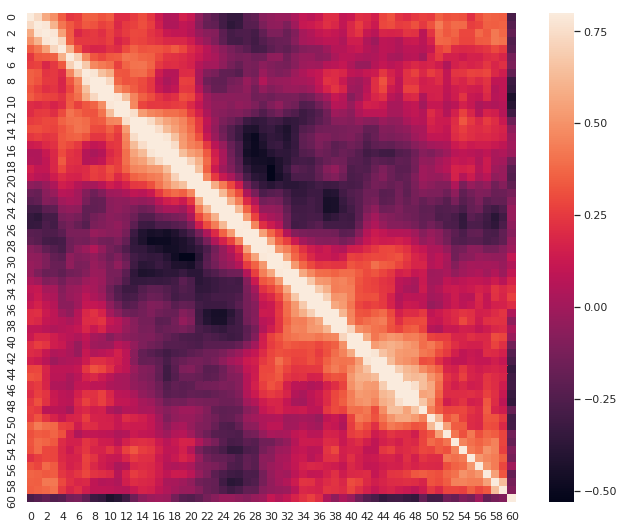

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = SONAR.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [107]:
# Create correlation matrix
corr_matrix = SONAR.corr().abs()

corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158,0.132327
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493,0.114748
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216,0.189314
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243,0.321448
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,0.341142


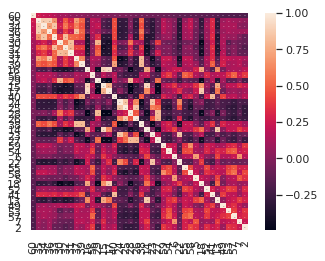

<Figure size 864x648 with 0 Axes>

In [108]:
k = 40 #number of variables for heatmap
cols = corrmat.nlargest(k, 60)[60].index
cm = np.corrcoef(SONAR[cols].values.T)

sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': .5}, yticklabels=cols.values, xticklabels=cols.values)
plt.figure(figsize=(12, 9))
plt.show()

Upper triangle matrix is enough to find correlation values. 

In [121]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,NaN,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
1,NaN,NaN,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
2,NaN,NaN,NaN,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
3,NaN,NaN,NaN,NaN,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
4,NaN,NaN,NaN,NaN,NaN,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
5,NaN,NaN,NaN,NaN,NaN,NaN,0.702889,0.471683,0.327578,0.288621,...,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158,0.132327
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675774,0.470580,0.425448,...,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493,0.114748
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778577,0.652525,...,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216,0.189314
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877131,...,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243,0.321448
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,0.341142


Data which has correlation values greater than 0.90 will be deleted. Because, similarity or correlation with '60' column (rock or mine feature) will make difficult fitting, set model. It means that these columns are unnecessary. 

In [122]:
dropped = [column for column in upper.columns if any(upper[column] > 0.90)]

In [123]:
SONAR = SONAR.drop(SONAR.columns[dropped], axis=1)

In [124]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,60
1,35
2,34
3,36
4,33
5,30
6,32
7,31
8,37
9,39


In [132]:
#split dataset

from sklearn.cross_validation import train_test_split
import random

random_value = random.randint(1,1500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=random_value)

### Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
X_train = sc_y.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

### Set Model 

We create a classification model and set parameter fittingly for optimizing.  

### Logistic Regression 

Logistic regression is used as classification model. In this model, we set different C parameter values and obtain different accuracy scores. C parameter control tradeof between bias and variance. So, it controls underfitting and overfitting. For small C values, regularization strength increases and this cause underfitting. For high C values, regularization strength decreases and this cause overfitting.



In [133]:
from sklearn.linear_model import LogisticRegression

accuracy_set = []
C_param_range = [0.0000001, 0.001,0.01,0.1,1,10,100,1000,10000000]

C_i = [i for i in range(0, len(C_param_range))]

for param_index in C_param_range:
    classifier = LogisticRegression(C=param_index, penalty='l2', solver='liblinear')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_set.append(classifier.score(X_test, y_test))
    print("for C: " + str(param_index) + " accuracy score is " + str(classifier.score(X_test, y_test)))
    

for C: 1e-07 accuracy score is 0.5
for C: 0.001 accuracy score is 0.5
for C: 0.01 accuracy score is 0.5576923076923077
for C: 0.1 accuracy score is 0.6346153846153846
for C: 1 accuracy score is 0.7884615384615384
for C: 10 accuracy score is 0.7884615384615384
for C: 100 accuracy score is 0.8269230769230769
for C: 1000 accuracy score is 0.8269230769230769
for C: 10000000 accuracy score is 0.8076923076923077


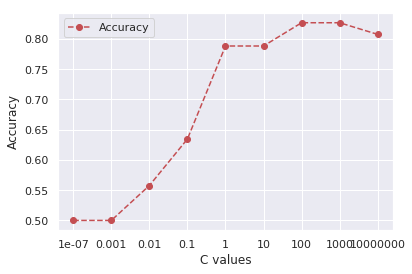

In [134]:
#plt.plot(C_param_range, accuracy_set, label='Accuracy')
plt.plot(C_i, accuracy_set, marker='o', linestyle='--', color='r', label='Accuracy') 

plt.ticklabel_format(style = 'sci')
plt.xticks(C_i, C_param_range)
plt.xlim()
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.legend()

### KNN Classification 

In [135]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1,20)
accuracy_set = []

for neighbor_index in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=neighbor_index, p=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_set.append(classifier.score(X_test, y_test))
    print("for k : " + str(neighbor_index) + " accuracy score is " + str(classifier.score(X_test, y_test)))



for k : 1 accuracy score is 0.8653846153846154
for k : 2 accuracy score is 0.7884615384615384
for k : 3 accuracy score is 0.8846153846153846
for k : 4 accuracy score is 0.8653846153846154
for k : 5 accuracy score is 0.8461538461538461
for k : 6 accuracy score is 0.8076923076923077
for k : 7 accuracy score is 0.7692307692307693
for k : 8 accuracy score is 0.7115384615384616
for k : 9 accuracy score is 0.6923076923076923
for k : 10 accuracy score is 0.6730769230769231
for k : 11 accuracy score is 0.6923076923076923
for k : 12 accuracy score is 0.6923076923076923
for k : 13 accuracy score is 0.6730769230769231
for k : 14 accuracy score is 0.7115384615384616
for k : 15 accuracy score is 0.7307692307692307
for k : 16 accuracy score is 0.7115384615384616
for k : 17 accuracy score is 0.7115384615384616
for k : 18 accuracy score is 0.7115384615384616
for k : 19 accuracy score is 0.7115384615384616


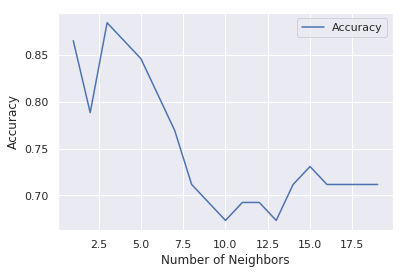

In [136]:
plt.plot(neighbors, accuracy_set, label='Accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

### k-means Algorithm 

k-means is a unsupervised algorithm. It is used in clustering. Clustering algorithm split data to disjoint clusters.

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


clusters = [1,2,3,4,5,6]


for cls in clusters:
    classifier = KMeans(n_clusters=cls,random_state=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("for k:" + str(cls) + " accuracy score is " + str(classifier.score(X_test, y_test)))


for k:1 accuracy score is -102.8534000850856
for k:2 accuracy score is -82.57276562520141
for k:3 accuracy score is -70.30529247229609
for k:4 accuracy score is -67.77057504633844
for k:5 accuracy score is -63.345266299616824
for k:6 accuracy score is -59.09020920640603



Clustering is not classification. Kmeans will always predict 1,...,k-1. It will never make a correct label on this data set, so we obtain nonsense results. 

### SVM Classification

It is classification method which is applied using Support Vector Machines algorithm. This gives better results on nonlineer distribution with suitable kernel which can be used as a parameter like 'rbf', 'poly'. 

In [160]:
from sklearn.svm import SVC

accuracy_set = []
C_param_range = [0.0000001, 0.001,0.01,0.1,1,10,100,1000,10000000]

C_i = [i for i in range(0, len(C_param_range))]

for param_index in C_param_range:
    classifier = SVC(kernel = 'rbf', C = param_index)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_set.append(classifier.score(X_test, y_test))
    print("for C: " + str(param_index) + " accuracy score is " + str(classifier.score(X_test, y_test)))


for C: 1e-07 accuracy score is 0.5
for C: 0.001 accuracy score is 0.5
for C: 0.01 accuracy score is 0.5
for C: 0.1 accuracy score is 0.5
for C: 1 accuracy score is 0.5769230769230769
for C: 10 accuracy score is 0.7692307692307693
for C: 100 accuracy score is 0.8269230769230769
for C: 1000 accuracy score is 0.8269230769230769
for C: 10000000 accuracy score is 0.8076923076923077


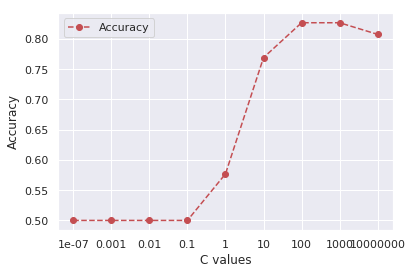

In [161]:
plt.plot(C_i, accuracy_set, marker='o', linestyle='--', color='r', label='Accuracy') 

plt.ticklabel_format(style = 'sci')
plt.xticks(C_i, C_param_range)
plt.xlim()
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.legend()